<a href="https://colab.research.google.com/github/vnflint/Data-Cleaning/blob/main/Project_Steve_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Scania/Malaria Deeper ANN 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from time import sleep

In [ ]:
cmap_bold = ListedColormap(["#FF0000","#0000FF", "#00FF00"])
cmap_light = ListedColormap(["#FFBBBB","#BBBBFF", "#BBFFBB"])

In [ ]:
#Activation and helper functions

def linear(H):
  return H 

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis = 1, keepdims = True)

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y - Y_hat)**2)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]] = 1
  
  return Y 

def accuracy(y, y_hat):
  return np.mean(y == y_hat)

def R2(y, y_hat):
  return 1-np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

def derivative(Z, a):
  if a == linear:
    return 1
  elif a == sigmoid:
    return Z*(1-Z)
  elif a == np.tanh:
    return 1-Z*Z
  elif a == ReLU:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown Activation Function")


In [ ]:
class ANN():
  
  def __init__(self, architecture, activations = None, mode = 0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1    #total number of layers

  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)

    if self.mode:
      Y = y 
    else:
      Y = one_hot_encode(y)

    N, D = X.shape
    K = Y.shape[1]

    #weights and bias initializations (random)
    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D] + self.architecture), (self.architecture + [K])), 1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

    #activation function loading
    if self.activations is None:
      self.a = {l: ReLU for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)}

    #mode set    
    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax


    J = np.zeros(epochs)

    #Gradient Descent
    for epoch in range(epochs):
      self.forward(X)
      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L])
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])
    
      dH = (1/N)*(self.Z[self.L] - Y)

      #Update Rules
      for l in sorted(self.W.keys(), reverse = True):
        dW = self.Z[l - 1].T@dH
        db = dH.sum(axis = 0)
        self.W[l] -= eta*dW
        self.b[l] -= eta*db
        if l > 1:
          dZ = dH@self.W[l].T
          dH = dZ*derivative(self.Z[l - 1], self.a[l - 1])

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")    
      plt.show()

  def forward(self, X):
    self.Z = {0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l - 1]@self.W[l] + self.b[l])

  def predict(self, X):
    self.forward(X)

    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis = 1)

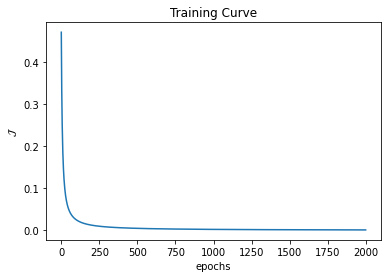

Training Accuracy: 1.0000


In [ ]:
#def main():
 # D = 2
 # K = 3
 # N = int(K*1e3)

data = pd.read_csv("Normalized_Train_With_Mean_Imput.csv", header = 0, usecols = range(1,12))
X = data.to_numpy()
y = X[:,-1]
X = X[:,:-1]
y = np.where(y==2, 0, y)
y = y.astype(int)
  #y = data['2'].to_numpy()
  #X = data[['0','1']].to_numpy()
  
myANN = ANN([10, 10, 10], [sigmoid, sigmoid, sigmoid])
myANN.fit(X, y, eta = 3e-2, epochs = 2e3, show_curve = True)
y_hat = myANN.predict(X)

#myANN = ANN([10, 12, 12, 10, 10], [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-2, epochs = 2e4, show_curve = True)

#myANN = ANN([10, 12, 12, 10, 10, 12, 12], [ReLU, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-2, epochs = 2e4, show_curve = True)

#myANN = ANN([10, 12, 12, 10, 10, 12, 12], [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-2, epochs = 2e4, show_curve = True)

#myANN = ANN([10, 12, 12, 10, 10, 12, 12], [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-1, epochs = 2e4, show_curve = True)

#myANN = ANN([10, 12, 12, 10, 10, 12, 12], [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-3, epochs = 2e4, show_curve = True)

#myANN = ANN([10, 12, 12, 10, 10, 12, 12, 12, 12], [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-2, epochs = 2e4, show_curve = True)

#myANN = ANN([10, 12, 12, 10, 10, 12, 12, 12, 12], [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, sigmoid])
#myANN.fit(X, y, eta = 3e-2, epochs = 2e5, show_curve = True)



print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")

In [ ]:
#if __name__ == "__main__":
#  main()
  

In [ ]:
df_test = pd.read_csv("Normalized_Test_With_Mean_Imput.csv", sep = ",", header = 0, usecols = range(1,12))
df_test.columns = ["class", "Temperature", "HeartRate", "NaiveTCellCount", "TCellCount", "Hemoglobin", "Platelets", "RedBloodCellsCount", "ViralLoad", "ChangeInTCellCount", "ChangeInRedBloodCellCount"]
df_test = df_test.to_numpy()
X_test = df_test[:, 1:]
y_test = df_test[:, 0]
y_hat_test = abs(myANN.predict(X_test)) 

In [ ]:
y_hat_test = np.around(y_hat_test)

print(f"Testing Accuracy: {accuracy(y, y_hat_test):0.4f}")


Testing Accuracy: 0.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
